# 使用knn进行手写数字识别

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## 数据集合

In [4]:
digits_data = load_digits()

In [5]:
digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
digits_data.data.shape

(1797, 64)

In [7]:
digits_data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
data_x = digits_data.data

data_y = digits_data.target

one_item = data_x[2].reshape(8,-1)
one_item

In [18]:
import matplotlib.pyplot as plt
import matplotlib

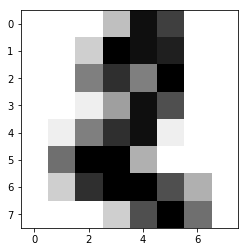

In [20]:
plt.imshow(one_item,cmap=matplotlib.cm.binary)
plt.show()

### 分割数据集

In [185]:
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,test_size=0.3,random_state=566)

### 将数据进行均值方差归一化

In [1]:
#这里就不详细写了 参照 数据归一化.ipynb

### 训练模型

In [186]:
knn_cla = KNeighborsClassifier(n_neighbors=1,weights="uniform",p=2)
knn_cla.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [187]:
predict_y = knn_cla.predict(test_x)

### 计算accuracy

In [188]:
accuracy_score(test_y,predict_y)

0.98518518518518516

In [189]:
knn_cla.score(test_x,test_y)

0.98518518518518516

### 寻找最好的超参数K,weights(权重)，p（明科夫斯基距离里的参数）

In [190]:
%%time
best_score = 0
best_k=0
best_weights = ""
best_p = -1
for w in ["uniform","distance"]:
    for k in range(1,7):
        for p in range(1,4):
            if w=="distance":
                score = KNeighborsClassifier(n_neighbors=k,weights=w,p=p).fit(train_x,train_y).score(test_x,test_y)
                if score>best_score:
                    best_score=score
                    best_k = k
                    best_weights = "uniform"
                    best_p = 2
            else:
                score = KNeighborsClassifier(n_neighbors=k).fit(train_x,train_y).score(test_x,test_y)
                if score>best_score:
                    best_score=score
                    best_k = k
                    best_weights = w
                    best_p = p

Wall time: 9.17 s


In [191]:
print("best_k:",best_k)

best_k: 1


In [192]:
print("best_score:",best_score)

best_score: 0.987037037037


In [193]:
print("best_weights:",best_weights)

best_weights: uniform


In [194]:
print("best_p:",best_p)

best_p: 2


### 寻找最好的p

In [72]:
%%time
best_p = -1
for p in range(1,10):
    score = KNeighborsClassifier(n_neighbors=best_k,weights=best_weights,p=p).fit(train_x,train_y).score(test_x,test_y)
    if score >= best_score:
        best_p = p

Wall time: 6.83 s


In [83]:
print("best_p:",best_p)

best_p: 1
